## Introduction to the Data

The E-commerce space has been on a imparative progression in recent years. 

#### The Dataset

The dataset consists of feature vectors or different online shoppers belonging to 12,330 sessions.

The dataset was formed so that each session would belong to a different user in a 1-year period to avoid any tendency to a specific campaign, special day, user profile, or period. 

The dataset consists of 10 numerical and 8 categorical attributes.

The 'Revenue' attribute is used as the target column. False representing that the user did not purchase any item while True indicating that a user purchase an item

Here's the data dictionary:

- "Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another. 

- The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. 

- The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. 

- The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.

In this project, I'll:

- Prepare the data for machine learning
- Train a model using Classifier models
- Measure the accuracy of the model

In [3]:
import pandas as pd
online_shoppers = pd.read_csv("online_shoppers_intention.csv")
online_shoppers.head(20)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


In [4]:
online_shoppers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes: bool(

## Feature Selection

In [8]:
online_shoppers.corr()["Revenue"]

Administrative             0.138917
Administrative_Duration    0.093587
Informational              0.095200
Informational_Duration     0.070345
ProductRelated             0.158538
ProductRelated_Duration    0.152373
BounceRates               -0.150673
ExitRates                 -0.207071
PageValues                 0.492569
SpecialDay                -0.082305
OperatingSystems          -0.014668
Browser                    0.023984
Region                    -0.011595
TrafficType               -0.005113
Weekend                    0.029295
Revenue                    1.000000
Name: Revenue, dtype: float64

In [9]:
online_shoppers["Informational"].value_counts(normalize=True) * 100

0     78.661800
1      8.442822
2      5.904298
3      3.081914
4      1.800487
5      0.802920
6      0.632603
7      0.291971
9      0.121655
8      0.113544
10     0.056772
12     0.040552
14     0.016221
11     0.008110
13     0.008110
24     0.008110
16     0.008110
Name: Informational, dtype: float64

In [10]:
online_shoppers["BounceRates"].value_counts(normalize=True) * 100

0.000000    44.752636
0.200000     5.677210
0.066667     1.086780
0.028571     0.932685
0.050000     0.916464
0.033333     0.819140
0.025000     0.811030
0.016667     0.802920
0.100000     0.794809
0.040000     0.778589
0.020000     0.738037
0.022222     0.713706
0.012500     0.689376
0.018182     0.656934
0.015385     0.616383
0.014286     0.592052
0.008333     0.583942
0.011111     0.502839
0.010000     0.494728
0.013333     0.437956
0.007692     0.429846
0.006667     0.413625
0.009524     0.413625
0.009091     0.381184
0.010526     0.364964
0.011765     0.356853
0.005556     0.340633
0.007407     0.316302
0.007143     0.283861
0.004545     0.275750
              ...    
0.002463     0.008110
0.000433     0.008110
0.008594     0.008110
0.002339     0.008110
0.035370     0.008110
0.014414     0.008110
0.012089     0.008110
0.002655     0.008110
0.001496     0.008110
0.014038     0.008110
0.000098     0.008110
0.003294     0.008110
0.002879     0.008110
0.007214     0.008110
0.015762  

In [11]:
online_shoppers["ExitRates"].value_counts(normalize=True) * 100

0.200000    5.758313
0.100000    2.741281
0.050000    2.668289
0.033333    2.360097
0.066667    2.165450
0.025000    1.816707
0.040000    1.735604
0.016667    1.467964
0.020000    1.354420
0.022222    1.232766
0.028571    1.216545
0.014286    0.957015
0.012500    0.908354
0.011111    0.835361
0.013333    0.705596
0.018182    0.705596
0.015385    0.673155
0.008333    0.632603
0.000000    0.616383
0.010000    0.567721
0.133333    0.543390
0.150000    0.486618
0.044444    0.470397
0.009524    0.437956
0.057143    0.437956
0.075000    0.437956
0.007143    0.413625
0.080000    0.373074
0.009091    0.364964
0.026667    0.364964
              ...   
0.028929    0.008110
0.029113    0.008110
0.008036    0.008110
0.026415    0.008110
0.027236    0.008110
0.012304    0.008110
0.034702    0.008110
0.031313    0.008110
0.050689    0.008110
0.049275    0.008110
0.005217    0.008110
0.027601    0.008110
0.015249    0.008110
0.007547    0.008110
0.004386    0.008110
0.005072    0.008110
0.010072    0

- Administrative and Administrative_Duration correlate, I'll select one
- ProductRelated  and ProductRelated_Duration correlate, I'll select one
- Informational and Informational_Duration contain data that are not nuanced , so I'll ignore both
- BounceRates  and ExitRates correlate, but I'll select ExitRates cause of a more nuanced data
- I'll also ignore OperatingSystems and TrafficType
- Offcourse Revenue is the target column

In [12]:
online_shoppers_features = online_shoppers[["Administrative_Duration","Weekend","ProductRelated", "Month","SpecialDay","ExitRates", "PageValues", "Region","Browser"]]

## Finding Missing Values

In [13]:
online_shoppers_features.isnull().sum()

Administrative_Duration    0
Weekend                    0
ProductRelated             0
Month                      0
SpecialDay                 0
ExitRates                  0
PageValues                 0
Region                     0
Browser                    0
dtype: int64

In [16]:
online_shoppers["Revenue"].isnull().sum()

0

## Feature Engineering and Data Processing

The Weekend column and the Revenue column are both in Boolean data type, I'll convert them to an int data type

In [17]:
online_shoppers_features["Weekend"] = online_shoppers_features["Weekend"].astype("int64")
online_shoppers["Revenue"] = online_shoppers["Revenue"].astype("int64")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Also the month column, need to be cleaned

In [20]:
mapping_dict = {
    "Month": { 
        "Feb": 2,
        "June": 6,
        "Jul": 7,
        "Aug": 8,
        "Sep": 9,
        "Oct": 10,
        "Dec": 12,
        "Mar": 3,
        "Nov": 11,
        "May": 5
        
    }
}

online_shoppers_features = online_shoppers_features.replace(mapping_dict)

In [21]:
online_shoppers["SpecialDay"].value_counts(normalize=True) * 100

0.0    89.854015
0.6     2.846715
0.8     2.635848
0.4     1.970803
0.2     1.443633
1.0     1.248986
Name: SpecialDay, dtype: float64

The SpecialDay column seem to be less nuanced (almost all the values are 0.0) which may lead to overfitting, to solve this - I'll combine the Month column and the SpecialDay column to get a more varied data

In [22]:
online_shoppers_features["Month_SpecialDay"] = online_shoppers_features["Month"] + online_shoppers_features["SpecialDay"]

In [25]:
online_shoppers_features["Month_SpecialDay"].value_counts(normalize=True) * 100

11.0    24.314680
5.0     17.777778
3.0     15.506894
12.0    14.006488
10.0     4.452555
9.0      3.633414
6.0      3.544201
8.0      3.511760
7.0      3.503650
5.6      2.692620
5.8      2.481752
5.4      1.800487
5.2      1.321979
2.0      0.851582
2.4      0.170316
2.8      0.154096
2.6      0.154096
2.2      0.121655
Name: Month_SpecialDay, dtype: float64

Month_SpecialDay, Region & Browser are meant to be categorical features, so I'll convert them to categorical features

In [26]:
online_shoppers_features["Month_SpecialDay"] = online_shoppers_features["Month_SpecialDay"].astype("category")
online_shoppers_features["Region"] = online_shoppers_features["Region"].astype("category")
online_shoppers_features["Browser"] = online_shoppers_features["Browser"].astype("category")

In [28]:
online_shoppers_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 10 columns):
Administrative_Duration    12330 non-null float64
Weekend                    12330 non-null int32
ProductRelated             12330 non-null int64
Month                      12330 non-null int64
SpecialDay                 12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
Region                     12330 non-null category
Browser                    12330 non-null category
Month_SpecialDay           12330 non-null category
dtypes: category(3), float64(4), int32(1), int64(2)
memory usage: 664.2 KB


#### Creating Dummies

Categorical features are made useful in machine Learning by introducing dummies

In [29]:
cat_columns = ["Month_SpecialDay","Region","Browser"]
dummy_df = pd.get_dummies(online_shoppers_features[cat_columns])
online_shoppers_features = pd.concat([online_shoppers_features, dummy_df], axis=1)
online_shoppers_features = online_shoppers_features.drop(cat_columns, axis=1)

In [31]:
online_shoppers_features = online_shoppers_features.drop(["Month", "SpecialDay"], axis=1)

In [32]:
online_shoppers_features

,Administrative_Duration,Weekend,ProductRelated,ExitRates,PageValues,Month_SpecialDay_2.0,Month_SpecialDay_2.2,Month_SpecialDay_2.4,Month_SpecialDay_2.6,Month_SpecialDay_2.8,...,Browser_4,Browser_5,Browser_6,Browser_7,Browser_8,Browser_9,Browser_10,Browser_11,Browser_12,Browser_13
0,0.000000,0,1,0.200000,0.000000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.000000,0,2,0.100000,0.000000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.000000,0,1,0.200000,0.000000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.000000,0,2,0.140000,0.000000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.000000,1,10,0.050000,0.000000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0.000000,0,19,0.024561,0.000000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0.000000,0,1,0.200000,0.000000,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
7,0.000000,1,0,0.200000,0.000000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0.000000,0,2,0.100000,0.000000,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,0.000000,0,3,0.022222,0.000000,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


#### Rescaling
I'll rescale all the numerical columns

In [33]:
from sklearn.preprocessing import minmax_scale
columns = ["Administrative_Duration", "Weekend", "ProductRelated", "ExitRates", "PageValues"]
for col in columns:
    online_shoppers_features[col + "_scaled"] = minmax_scale(online_shoppers_features[col])

In [34]:
online_shoppers_features = online_shoppers_features.drop(columns, axis=1)

In [35]:
online_shoppers_features

,Month_SpecialDay_2.0,Month_SpecialDay_2.2,Month_SpecialDay_2.4,Month_SpecialDay_2.6,Month_SpecialDay_2.8,Month_SpecialDay_3.0,Month_SpecialDay_5.0,Month_SpecialDay_5.2,Month_SpecialDay_5.4,Month_SpecialDay_5.6,...,Browser_9,Browser_10,Browser_11,Browser_12,Browser_13,Administrative_Duration_scaled,Weekend_scaled,ProductRelated_scaled,ExitRates_scaled,PageValues_scaled
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.000000,0.0,0.001418,1.000000,0.000000
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.000000,0.0,0.002837,0.500000,0.000000
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.000000,0.0,0.001418,1.000000,0.000000
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.000000,0.0,0.002837,0.700000,0.000000
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.000000,1.0,0.014184,0.250000,0.000000
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.000000,0.0,0.026950,0.122807,0.000000
6,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0.000000,0.0,0.001418,1.000000,0.000000
7,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.000000,1.0,0.000000,1.000000,0.000000
8,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0.000000,0.0,0.002837,0.500000,0.000000
9,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0.000000,0.0,0.004255,0.111111,0.000000


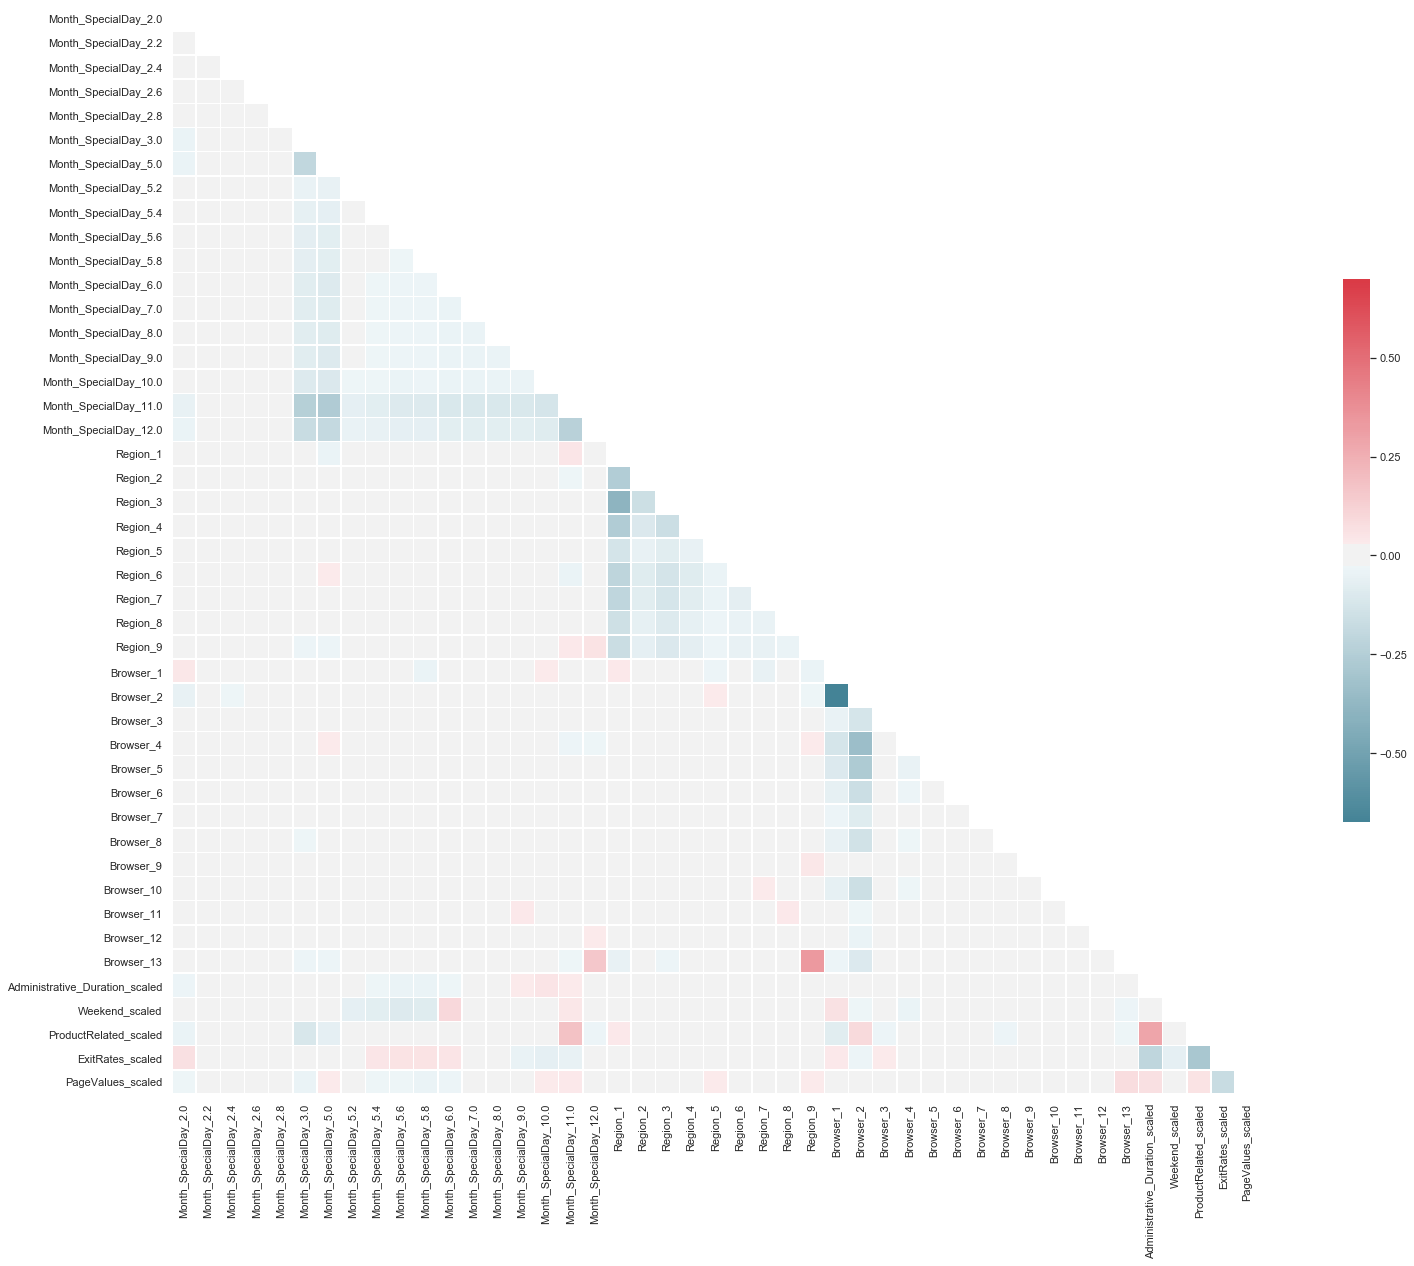

In [37]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

def plot_correlation_heatmap(df):
    corr = df.corr()
    
    sns.set(style="white")
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    f, ax = plt.subplots(figsize=(30, 20))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)


    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.7, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.show()

columns = online_shoppers_features
plot_correlation_heatmap(columns)

## Training a Model with Random Forest Classifier

From the code blocks, I can see that the features aren't strongly correlated, hence a Random Forest Classifier model is suitable to train a model

#### Picking an error metric

I'll choose accuracy as my error metric here

In [38]:
online_shoppers_features.columns

Index(['Month_SpecialDay_2.0', 'Month_SpecialDay_2.2', 'Month_SpecialDay_2.4',
       'Month_SpecialDay_2.6', 'Month_SpecialDay_2.8', 'Month_SpecialDay_3.0',
       'Month_SpecialDay_5.0', 'Month_SpecialDay_5.2', 'Month_SpecialDay_5.4',
       'Month_SpecialDay_5.6', 'Month_SpecialDay_5.8', 'Month_SpecialDay_6.0',
       'Month_SpecialDay_7.0', 'Month_SpecialDay_8.0', 'Month_SpecialDay_9.0',
       'Month_SpecialDay_10.0', 'Month_SpecialDay_11.0',
       'Month_SpecialDay_12.0', 'Region_1', 'Region_2', 'Region_3', 'Region_4',
       'Region_5', 'Region_6', 'Region_7', 'Region_8', 'Region_9', 'Browser_1',
       'Browser_2', 'Browser_3', 'Browser_4', 'Browser_5', 'Browser_6',
       'Browser_7', 'Browser_8', 'Browser_9', 'Browser_10', 'Browser_11',
       'Browser_12', 'Browser_13', 'Administrative_Duration_scaled',
       'Weekend_scaled', 'ProductRelated_scaled', 'ExitRates_scaled',
       'PageValues_scaled'],
      dtype='object')

In [39]:
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [40]:
print(online_shoppers["Revenue"].value_counts(normalize=True) *100)

0    84.525547
1    15.474453
Name: Revenue, dtype: float64


There's a kind of class imbalance in our target column, which make the model to predict more of the superior class, setting class_weight = "balanced" will annul this

In [44]:
X = online_shoppers_features[['Month_SpecialDay_2.0', 'Month_SpecialDay_2.2', 'Month_SpecialDay_2.4',
       'Month_SpecialDay_2.6', 'Month_SpecialDay_2.8', 'Month_SpecialDay_3.0',
       'Month_SpecialDay_5.0', 'Month_SpecialDay_5.2', 'Month_SpecialDay_5.4',
       'Month_SpecialDay_5.6', 'Month_SpecialDay_5.8', 'Month_SpecialDay_6.0',
       'Month_SpecialDay_7.0', 'Month_SpecialDay_8.0', 'Month_SpecialDay_9.0',
       'Month_SpecialDay_10.0', 'Month_SpecialDay_11.0',
        'Region_1', 'Region_2', 'Region_3', 
       'Region_5', 'Region_6', 'Region_7', 'Region_8', 'Region_9', 'Browser_1',
        'Browser_3', 'Browser_4', 'Browser_6',
       'Browser_7', 'Browser_8', 'Browser_9', 'Browser_10', 'Browser_11',
       'Browser_12', 'Browser_13', 'Administrative_Duration_scaled',
       'Weekend_scaled', 'ProductRelated_scaled', 'ExitRates_scaled',
       'PageValues_scaled']]
Y = online_shoppers["Revenue"]

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
rf = RandomForestClassifier(class_weight="balanced", random_state=1)
scores = cross_val_score(rf, X, Y, cv=10)
accuracy = np.mean(scores)
print(accuracy)

0.8759135575362107


I'll have an accuracy of about 88%